In [1]:
import numpy as np

import sys
sys.path.append("..")
sys.path.append("csaf/core")

import csaf
import matplotlib.pyplot as plt
from f16lib import fgnetfdm, fgintruder

from f16lib.goals import AcasSimpleCollideWithBalloonGoal
from f16lib.goals import AcasSimpleCollideAvoidBalloonGoal
from f16lib.goals import AcasShieldAvoidBalloonGoal
from f16lib.goals import AcasAirspeedAvoidNoBalloonGoal
from f16lib.goals import AcasAirspeedCollideNoBalloonGoal

from f16lib.acas import AcasScenarioViewer

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def closest_point(trajs):
    # Find the point of closest contact
    ownship = trajs['plant']['states']
    intruder = trajs['intruder_plant']['states']

    d_min = np.inf
    d_idx = 0
    for idx in range(0,min(len(ownship),len(intruder))):
        pn_o = ownship[idx][9]
        pe_o = ownship[idx][10]
        pn_i = intruder[idx][9]
        pe_i = intruder[idx][10]
        d = np.sqrt((pn_o -pn_i)**2 + (pe_o - pe_i)**2)
        if d < d_min:
            d_min = d
            d_idx = idx

    pn_0 = ownship[d_idx][9]
    pe_0 = ownship[d_idx][10]
    print(f"D_min={d_min}, idx={d_idx}, pn_0 = {pn_0},pe_0={pe_0}")
    return pn_0, pe_0

def get_camera(trajs, pn_0, pe_0):
    # Place camera
    import copy
    camera = copy.deepcopy(trajs['balloon'])
    for state in camera.states:
        state[9] = pn_0
        state[10] = pe_0
    trajs['camera'] = camera
    return trajs

In [3]:
f16a = fgnetfdm.FGNetFDM(h0_m=1500)
f16b = fgintruder.FGIntruder(callsign='F-16B', model_path='Aircraft/f16/Models/F-16.xml', fallback_model_index=516)
balloon = fgintruder.FGIntruder(callsign='Balloon', model_path='Aircraft/Hot-Air-Balloon/Models/Hot-Air-Balloon.xml', fallback_model_index=702)
camera = fgintruder.FGIntruder(callsign='Camera', model_path='Aircraft/ufo/Models/ufo.xml', fallback_model_index=712)

In [4]:
f16a.start()
f16b.start()
balloon.start()
camera.start()

<FGNetFDM> Starting main loop!
<FGIntruder> Starting main loop!
<FGIntruder> Starting main loop!
<FGIntruder> Starting main loop!


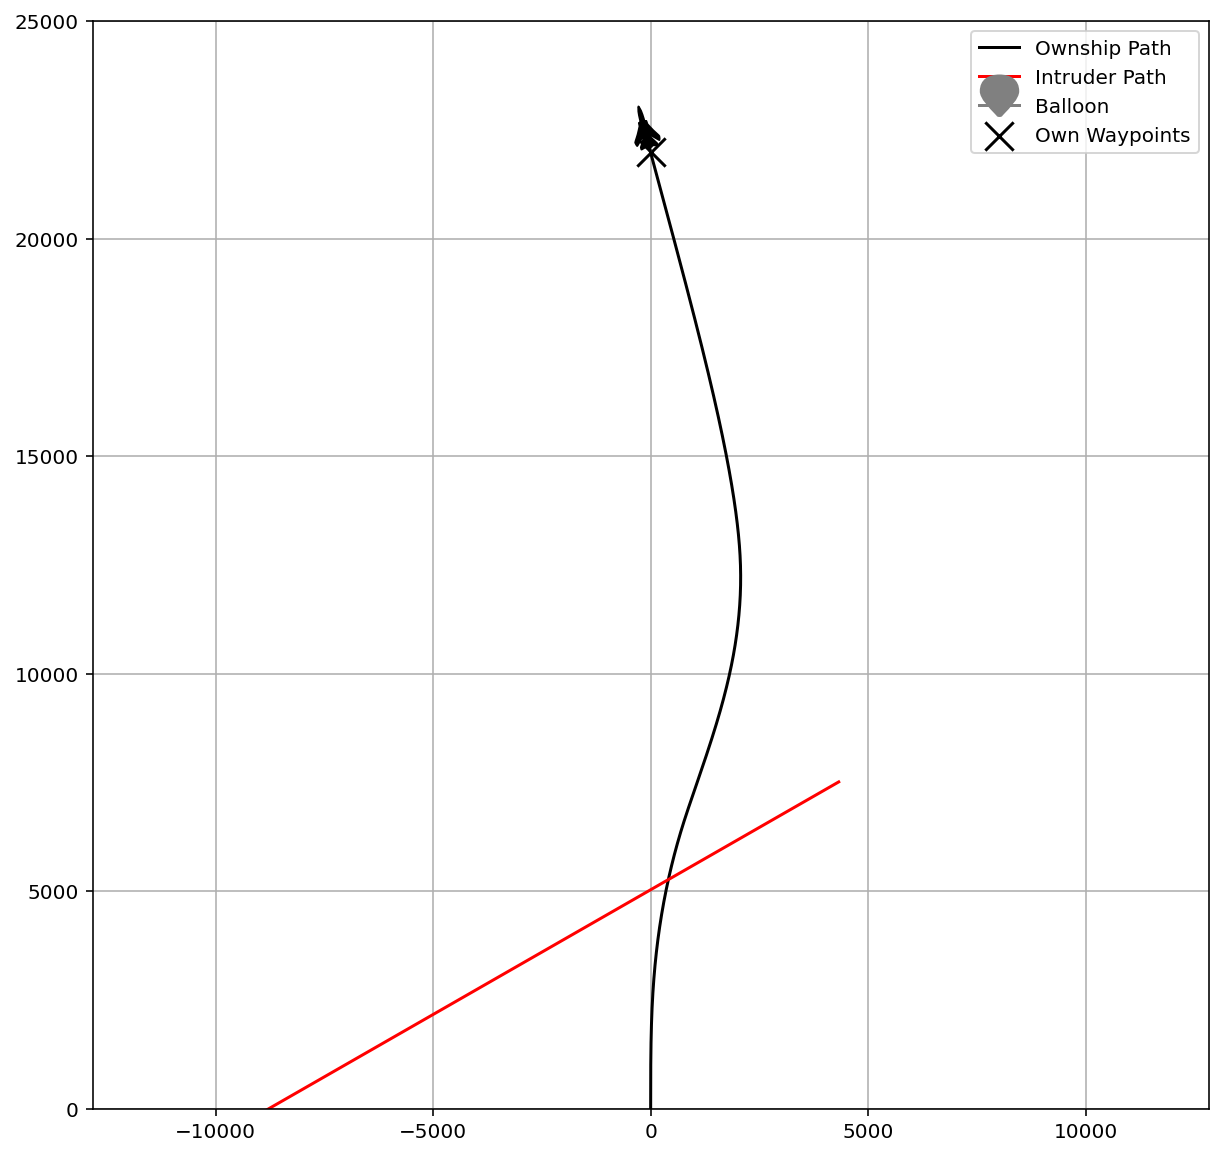

<Figure size 720x720 with 0 Axes>

D_min=318.6591783788518, idx=184, pn_0 = 4882.103911956496,pe_0=327.43641433983186


In [5]:
#g = AcasSimpleCollideWithBalloonGoal()
#g = AcasSimpleCollideAvoidBalloonGoal()
#g = AcasShieldAvoidBalloonGoal()
#g = AcasAirspeedAvoidNoBalloonGoal()
g = AcasAirspeedCollideNoBalloonGoal()

trajs, p = g.run_sim(g.fixed_configurations[0])

scen = g.scenario_type()
viewer = AcasScenarioViewer(trajs, scen)
fig, ax = viewer.summary_plot()
ax.set_xlim(-10000, 10000)
ax.set_ylim(0, 25000)
plt.show()

pn_0,pe_0 = closest_point(trajs)
trajs = get_camera(trajs, pn_0, pe_0)



# Properly prepare the intruders
f16a.set_trajs(trajs['plant'],trajs['llc'])
f16b.set_trajs(trajs['intruder_plant'],trajs['intruder_llc'])
# LLC for balloon doesn't matter
balloon.set_trajs(trajs['balloon'],trajs['llc'])
camera.set_trajs(trajs['camera'],trajs['llc'])



In [6]:
f16a.reset()
f16b.reset()
balloon.reset()
camera.reset()

In [7]:
# Run the simulation
f16a.simulate(delta_t=0.01,speed=0.9)
f16b.simulate(delta_t=0.5,speed=0.9)
balloon.simulate(delta_t=0.5,speed=0.9)
camera.simulate(delta_t=0.5,speed=0.9)

In [8]:
f16a.stop()
f16b.stop()
balloon.stop()
camera.stop()

<FGIntruder> Main loop stopped.<FGIntruder> Main loop stopped.
<FGNetFDM> Main loop stopped.

<FGIntruder> Main loop stopped.
